## 1. Import Necessary libraries

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data.head(30)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


## 3. Data Understanding

In [5]:
claimants_data.shape

(1340, 7)

In [6]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [8]:
claimants_data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


## 4. Data Preparation

In [3]:
del claimants_data['CASENUM']

In [10]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants_data.dropna(axis = 0,inplace=True)

In [12]:
claimants_data.shape

(1096, 6)

In [13]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [14]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

## 5. Model Building

In [5]:
X = claimants_data.drop(labels='ATTORNEY',axis=1)
y = claimants_data[['ATTORNEY']]

### Model Validation Techniques

#### 1. Train - Test Split

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [22]:
X_train.shape,y_train.shape

((876, 5), (876, 1))

In [34]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
965,0.0,1.0,0.0,49.0,4.714
448,0.0,1.0,0.0,64.0,3.457
802,1.0,1.0,0.0,11.0,3.713
567,1.0,0.0,0.0,40.0,8.406
602,1.0,1.0,0.0,13.0,0.150
...,...,...,...,...,...
513,1.0,1.0,0.0,64.0,0.061
580,1.0,1.0,0.0,8.0,6.047
59,0.0,1.0,0.0,10.0,0.987
334,0.0,1.0,0.0,8.0,5.830


In [35]:
y_train

,ATTORNEY
965,1
448,0
802,0
567,1
602,1
...,...
513,1
580,0
59,1
334,0


#### 2. K-Fold CV

In [112]:
from sklearn.model_selection import KFold,cross_val_score

n_fold = KFold(n_splits=5,shuffle=True, random_state=12)

cv_scores = cross_val_score(estimator = logistic_model,X = X,y=y,cv=n_fold)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [0.68636364 0.72146119 0.71232877 0.74429224 0.66210046]
Mean Accuracy :  0.7053092569530925
Std Deviation :  0.028480758795126154


#### 3. LOOCV

In [115]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()

cv_scores = cross_val_score(estimator = logistic_model,X = X,y=y,cv=loocv)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [1. 1. 1. ... 1. 1. 1.]
Mean Accuracy :  0.7025547445255474
Std Deviation :  0.4571340891578643


### 6. Model Training

In [107]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [84]:
rf_classifier = RandomForestClassifier(max_depth=5)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [85]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [41]:
logistic_model.coef_

array([[ 0.35680679,  0.67570996, -0.57875527,  0.00657283, -0.39132083]])

In [42]:
logistic_model.intercept_

array([-0.20995559])

### Plot The tree

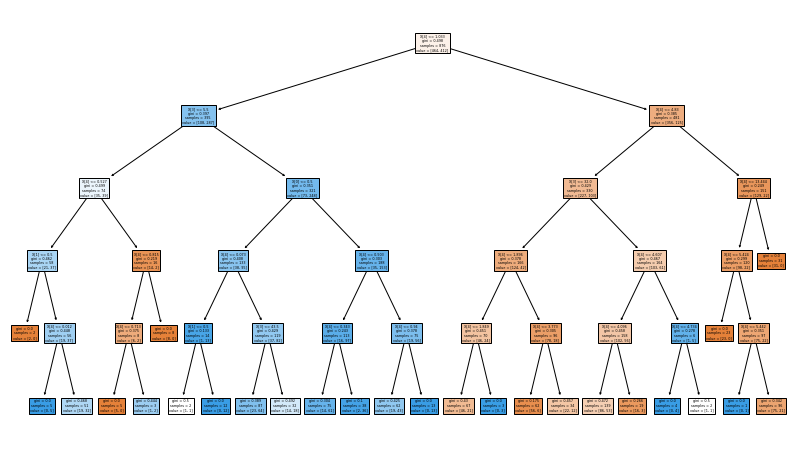

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,8))
plot_tree(decision_tree = dt_model, filled=True)
plt.show()

### GridSearchCV Technique

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.7326400996264011


### Stacking Technique

In [101]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


logistic_model = LogisticRegression()
dt_model       = DecisionTreeClassifier()
svm_classifier = SVC()

voting_classifier = VotingClassifier(estimators = [('log_model',logistic_model),
                                                   ('decision_tree_model',dt_model),
                                                   ('svm_model',svm_classifier)])
voting_classifier.fit(X_train,y_train)

y_pred = voting_classifier.predict(X_test)

accuracy_score(y_test,y_pred)

0.6681818181818182

### 7. Model Testing || 8. Model Evaluation

#### Training Data

In [86]:
y_pred_train = rf_classifier.predict(X_train)

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_train,y_pred_train))

0.7614155251141552


In [88]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       464
           1       0.77      0.70      0.73       412

    accuracy                           0.76       876
   macro avg       0.76      0.76      0.76       876
weighted avg       0.76      0.76      0.76       876



In [75]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Confusion Matrix:
 [[463   1]
 [  2 410]]


0.7577837294944761


Text(0, 0.5, 'True Positive Rate')

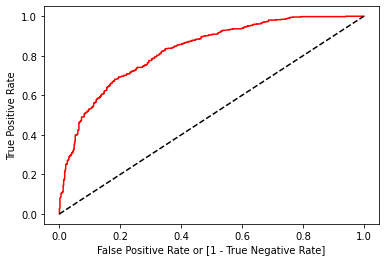

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, rf_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### Test Data

In [90]:
y_pred_test = rf_classifier.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_test)

0.7

In [81]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64       114
           1       0.62      0.62      0.62       106

    accuracy                           0.63       220
   macro avg       0.63      0.63      0.63       220
weighted avg       0.63      0.63      0.63       220



In [82]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Confusion Matrix:
 [[73 41]
 [40 66]]


0.6999337967560411


Text(0, 0.5, 'True Positive Rate')

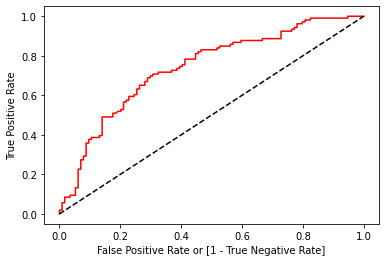

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## =========================================================================

## BIAS - VARIANCE

* Training Error/Accuracy - Bias
* Test Error/Accuracy - Variance.

### Model Overfitting - Less Bias and High Variance.
### Model Underfitting - High Bias and Less Variance.

### EXPECTED MODEL -- GENERALIZED MODEL - Less Bias and Less Variance.

So, there is always a **Tradeoff maintaned between Bias and Variance.**

## =========================================================================

### 9. Model Deployement

In [51]:
from pickle import dump

In [52]:
dump(logistic_model,open('log_model.pkl','wb'))

In [53]:
from pickle import load

In [55]:
loaded_logistic_model = load(open('log_model.pkl','rb'))

In [59]:
y_prediction_validation = loaded_logistic_model.predict(X_test)

# THE END!!